In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk

In [58]:
data = sk.datasets.load_wine(as_frame=True)
df = pd.read_csv("WineQT.csv")

In [59]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


In [60]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [61]:
X = df[['volatile acidity', 'alcohol']]
y = (df['quality'] > 5).astype(int)
X, y

(      volatile acidity  alcohol
 0                0.700      9.4
 1                0.880      9.8
 2                0.760      9.8
 3                0.280      9.8
 4                0.700      9.4
 ...                ...      ...
 1138             0.510     11.0
 1139             0.620      9.5
 1140             0.600     10.5
 1141             0.550     11.2
 1142             0.645     10.2
 
 [1143 rows x 2 columns],
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 1138    1
 1139    1
 1140    0
 1141    1
 1142    0
 Name: quality, Length: 1143, dtype: int64)

In [62]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
def sigmoid(z):
        return 1 / (1 + np.exp(-z))

In [64]:
def logloss(y_hat_sigmoid, y):
    m = len(y)
    cost = (-1 / m) * (np.dot(y, np.log(y_hat_sigmoid)) + np.dot((1 - y), np.log(1 - y_hat_sigmoid)))
    return cost

In [65]:
class LogisticRegression:
    def __init__(self, lr, num_iterations):
        self.w = None
        self.lr = lr
        self.num_iterations = num_iterations
        self.costs_list = []

    def add_bias(self, X):
        X_with_bais = np.c_[X, np.ones(X.shape[0])]
        return X_with_bais

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
        self.w = np.zeros(self.X_train.shape[1])
        print("w = ", self.w)
        self.w, self.costs_list = self.gradient_descent(self.X_train, self.y_train, self.w)
        return self.w, self.costs_list

    def gradient_descent(self, X, y, w):
        costs = []
        m = len(y)
        for i in range(self.num_iterations):
            y_hat = X.dot(w)
            y_hat_sigmoid = sigmoid(y_hat)
            error = y_hat_sigmoid - y
            w = w - (self.lr / m) * error.dot(X).T
            costs.append(logloss(y_hat_sigmoid, y))
        return w, costs
    
    def predict(self, X):
        z = sigmoid(X.dot(self.w))
        return z > 0.5

In [66]:
logistic_regression = LogisticRegression(0.1, 10000)

In [67]:
X_train = logistic_regression.add_bias(X_train)

In [68]:
costs_list = []
w, costs_list = logistic_regression.fit(X_train, y_train)

w =  [0. 0. 0.]


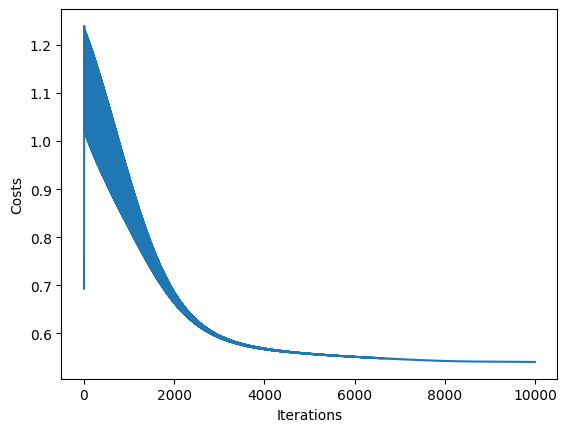

In [69]:
plt.plot(range(logistic_regression.num_iterations), costs_list)
plt.xlabel('Iterations')
plt.ylabel('Costs')
plt.show()

In [70]:
y_train_preds = logistic_regression.predict(X_train)

In [71]:
X_test = logistic_regression.add_bias(X_test)
y_test_preds = logistic_regression.predict(X_test)

In [72]:
def accuracy(y, y_pred):
    return np.mean(y == y_pred)

In [73]:
def precision(y, y_pred):
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    return tp / (tp + fp)

In [74]:
def recall(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn)

In [75]:
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * (p * r) / (p + r)

In [76]:
print("Training Accuracy: ", accuracy(y_train, y_train_preds))
print("Testing Accuracy: ", accuracy(y_test, y_test_preds))

Training Accuracy:  0.7461706783369803
Testing Accuracy:  0.7248908296943232


In [77]:
print("Training Precision: ", precision(y_train, y_train_preds))
print("Testing Precision: ", precision(y_test, y_test_preds))

Training Precision:  0.7752100840336135
Testing Precision:  0.753968253968254


In [78]:
print("Training Recall: ", recall(y_train, y_train_preds))
print("Testing Recall: ", recall(y_test, y_test_preds))

Training Recall:  0.7469635627530364
Testing Recall:  0.7480314960629921


In [79]:
fpr, tpr, _ = sk.metrics.roc_curve(y_test, logistic_regression.predict(X_test))
roc_auc = sk.metrics.auc(fpr, tpr)

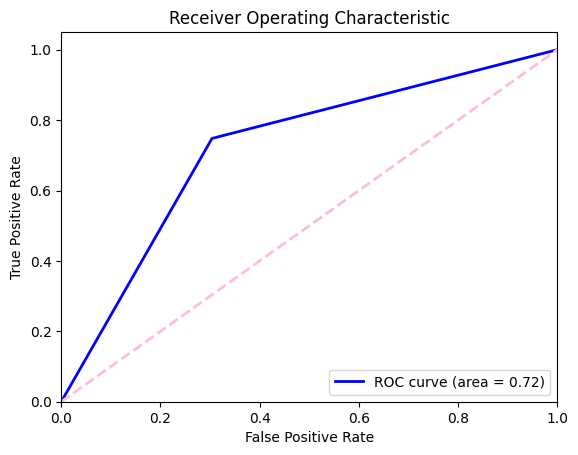

In [80]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [81]:
sample_test_cases = np.array([
    [0.4, 9.0],
    [1.0, 12.5]
])

In [82]:
sample_test_cases = logistic_regression.add_bias(sample_test_cases)
sample_predictions = logistic_regression.predict(sample_test_cases)
print("Sample Predictions: ", sample_predictions)

Sample Predictions:  [False  True]


In [83]:
def plot_decision_boundary(X, y, model):
    X_set = X[:, :2]
    
    x_min, x_max = X_set[:, 0].min() - 1, X_set[:, 0].max() + 1
    y_min, y_max = X_set[:, 1].min() - 1, X_set[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    

    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = model.add_bias(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y, cmap=ListedColormap(('red', 'green')), edgecolors='k')
    
    plt.title('Logistic Regression Decision Boundary')
    plt.xlabel('Volatile Acidity')
    plt.ylabel('Alcohol')
    plt.show()

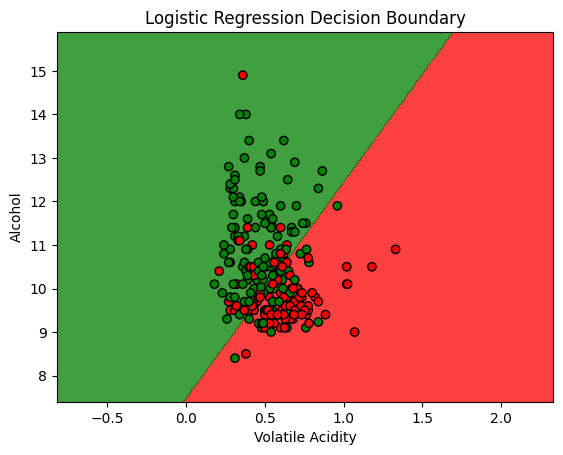

In [84]:
plot_decision_boundary(X_test, y_test, logistic_regression)